# Data visualization with 3D Charts
## Minimise cost func - $f(x, y) = \frac{1}{r + 1}$ where $r$ is $3^{-x^2 - y^2}$

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map
from sympy import symbols, diff
from math import log
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
def f(x, y):
    r = 3 ** (-x ** 2 - y ** 2)
    return 1 / (r + 1)

In [10]:
#Make the data
x = np.linspace(start=-2, stop=2, num=200)
y = np.linspace(start=-2, stop=2, num=200)
print(f"Shape of X array {x.shape}") # Vector
x, y = np.meshgrid(x, y) # Coordinate vector to coordinate matrix

Shape of X array (200,)


C:\Users\warma\AppData\Local\Temp/ipykernel_19320/3332898790.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection="3d") # Get current axes


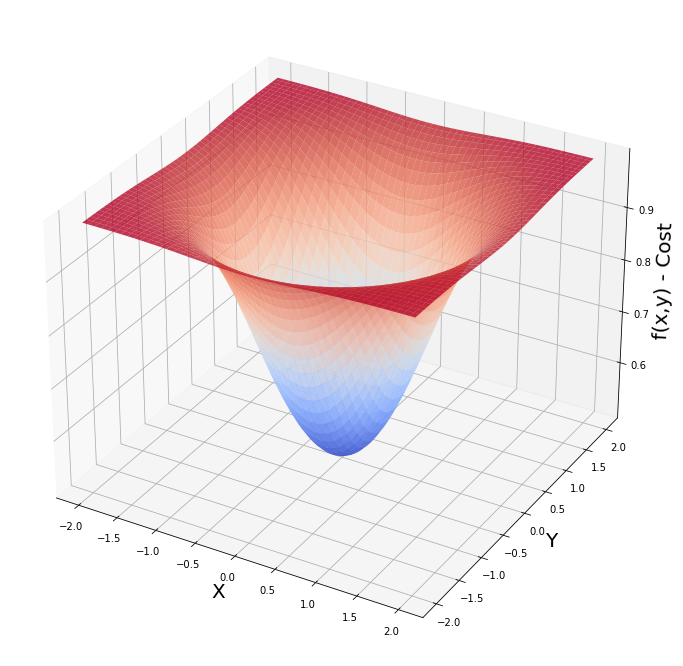

In [11]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12]) # Generating an instance
axes = fig.gca(projection="3d") # Get current axes
axes.set_xlabel("X", fontsize=20)
axes.set_ylabel("Y", fontsize=20)
axes.set_zlabel("f(x,y) - Cost", fontsize=20)

axes.plot_surface(x, y, f(x, y), cmap=cm.coolwarm, alpha=0.8)


plt.show()

## Partial Derivatives and Symbolic Computation
## $\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2-y^2} + 1 \right)^2}$
## $\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2-y^2} + 1 \right)^2}$

In [12]:
a, b = symbols("x, y")
print(f"Cost func(x,y) : {f(a, b)}")

print(f"Partial derivative: {diff(f(a, b), a)}") # Partial derivative regarding to a (x)

print(f"Value of f(x,y) with x=1.8 y=1.0 is : {f(a, b).evalf(subs={a:1.8, b:1.0})}") # Cost
print(f"Value of partial derivative regarding x: {diff(f(a, b), a).evalf(subs={a:1.8, b:1.0})}")

Cost func(x,y) : 1/(3**(-x**2 - y**2) + 1)
Partial derivative: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) with x=1.8 y=1.0 is : 0.990604794032582
Value of partial derivative regarding x: 0.0368089716197505


## Batch Gradient Descent with SymPy



In [13]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    
    params = params - multiplier * gradients
    
print(f"Values in gradient array: {gradients}")
print(f"Minimum occurs at x value of: {params[0]}")
print(f"Minimum occurs at y value of: {params[1]}")
print(f"The cost is: {f(params[0], params[1])}")

Values in gradient array: [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of: 3.45838599885832E-11
Minimum occurs at y value of: 1.92132555492129E-11
The cost is: 0.500000000000000


In [14]:
# Partial derivative functions
# With regard to X
def fpx(x, y): 
    r = 3 ** (-x ** 2 - y ** 2)
    return 2 * x * log(3) * r / (r + 1) ** 2

# With regard to Y
def fpy(x, y):
    r = 3 ** (-x ** 2 - y ** 2)
    return 2 * y * log(3) * r / (r + 1) ** 2

In [15]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    
    params = params - multiplier * gradients
    
print(f"Values in gradient array: {gradients}")
print(f"Minimum occurs at x value of: {params[0]}")
print(f"Minimum occurs at y value of: {params[1]}")
print(f"The cost is: {f(params[0], params[1])}")

Values in gradient array: [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


## Graphing 3D Gradient Descent & Advanced Numpy Arrays

In [16]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess

values_array = params.reshape(1, 2) # 1 row 2 columns

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    
    params = params - multiplier * gradients
    
    values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    
    
print(f"Values in gradient array: {gradients}")
print(f"Minimum occurs at x value of: {params[0]}")
print(f"Minimum occurs at y value of: {params[1]}")
print(f"The cost is: {f(params[0], params[1])}")

Values in gradient array: [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of: 3.458385998858304e-11
Minimum occurs at y value of: 1.9213255549212797e-11
The cost is: 0.5


C:\Users\warma\AppData\Local\Temp/ipykernel_19320/3984426377.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axes = fig.gca(projection="3d") # Get current axes


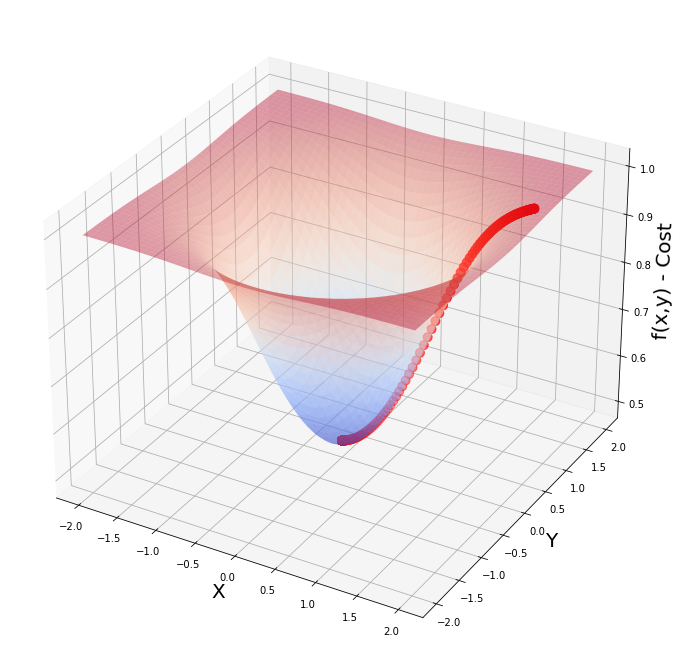

In [25]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12]) # Generating an instance
axes = fig.gca(projection="3d") # Get current axes
axes.set_xlabel("X", fontsize=20)
axes.set_ylabel("Y", fontsize=20)
axes.set_zlabel("f(x,y) - Cost", fontsize=20)

axes.plot_surface(x, y, f(x, y), cmap=cm.coolwarm, alpha=0.4)
axes.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), s=80, color="red")


plt.show()

In [18]:
# Advanced Numpy Array:
kirk = np.array([["Captain", "Guitar"]])
print(kirk.shape)
hs_band = np.array([["Black thought", "MC"], ["Questlove", "Drums"]]) # <- 2 dim. array
print(hs_band.shape)

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

(1, 2)
(2, 2)
[['Black thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]


In [19]:
print(f"Printing names: {the_roots[:, 0]}")

Printing names: ['Black thought' 'Questlove' 'Captain']


In [20]:
print(f"Printing band roles: {the_roots[:, 1]}")

Printing band roles: ['MC' 'Drums' 'Guitar']


# Working with data and real cost function
## Mean Squared Error: a cost function for regression problems
## $RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}\big)^2 $
## $MSE = = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}\big)^2 $
## $MSE = = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $

In [30]:
# Make sample data
x_1 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose() # 1d to 2d
y_1 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1) # 1d to 2d
print(x_1.shape)
print(y_1.shape)

(7, 1)
(7, 1)


In [37]:
# The linear regression
regr = LinearRegression()
regr.fit(x_1, y_1)
print(f"Theta 0: {regr.intercept_[0]}")
print(f"Theta 1: {regr.coef_[0][0]}") # Slope

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


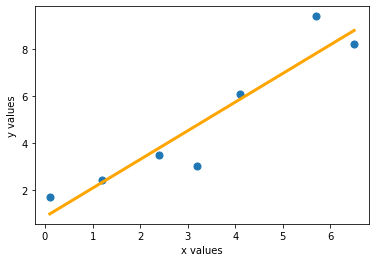

In [38]:
# Plot the poitns
plt.scatter(x_1, y_1, s=50)
plt.plot(x_1, regr.predict(x_1), color="orange", linewidth=3)
plt.xlabel("x values")
plt.ylabel("y values")
plt.show()

In [43]:
# y_hat = theta0 + theta1*x
y_hat = 0.8475351486029536 + 1.2227264637835915 * x_1
print(f"Estimated values y_hat are:\n {y_hat}")
print(f"In comparison, the actual y values are : \n{y_1}")

Estimated values y_hat are:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are : 
[[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [46]:
def mse(y, y_hat):
#     mse_calc =  1 / len(y_1) * sum((y - y_hat) ** 2)
    mse_calc = np.average((y - y_hat) ** 2, axis=0)
    return mse_calc


In [62]:
print(f"Manually calculated MSE is : {mse(y_1, y_hat)}")
print(f"MSE regression using manual calc is: {mean_squared_error(y_1, y_hat)}")
print(f"MSE regression is: {mean_squared_error(y_1, regr.predict(x_1))}")

Manually calculated MSE is : [0.94796558]
MSE regression using manual calc is: 0.9479655759794577
MSE regression is: 0.9479655759794577


## Together:


In [63]:
# Make sample data
x_1 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose() # 1d to 2d
y_1 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1) # 1d to 2d

regr = LinearRegression()
regr.fit(x_1, y_1)

print(f"MSE regression is: {mean_squared_error(y_1, regr.predict(x_1))}")


MSE regression is: 0.9479655759794577


## 3D Plot for the MSE cost Function
### Make data for thetas

In [73]:
number_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=number_thetas)
th_1 = np.linspace(start=-1, stop=3, num=number_thetas)

plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


## Calc MSE 

In [74]:
plot_cost = np.zeros((number_thetas, number_thetas))

for i in range(number_thetas):
    for j in range(number_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_1
        plot_cost[i][j] = mse(y_1, y_hat)
    
print(f"Shape of plot_t0: {plot_t0.shape}")
print(f"Shape of plot_t1: {plot_t1.shape}")
print(f"Shape of plot_cost: {plot_cost.shape}")

Shape of plot_t0: (200, 200)
Shape of plot_t1: (200, 200)
Shape of plot_cost: (200, 200)


C:\Users\warma\AppData\Local\Temp/ipykernel_19320/1829772495.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


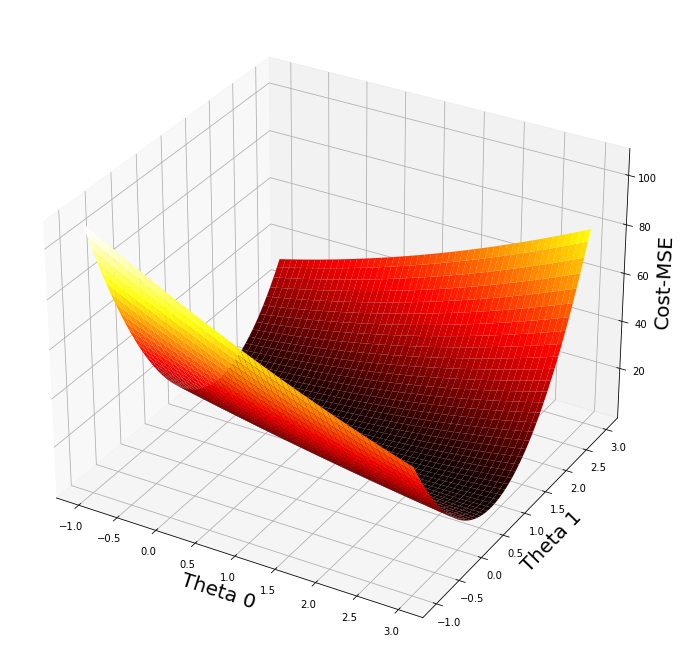

In [76]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection="3d")

ax.set_xlabel("Theta 0", fontsize=20)
ax.set_ylabel("Theta 1", fontsize=20)
ax.set_zlabel("Cost-MSE", fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [81]:
print(f"Min value of plot_cost: {plot_cost.min()}")
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print(f"Min occurs at (i, k): {ij_min}")
print(f"Min MSE for Theta 0 at plot_t0[111][91]: {plot_t0[111][91]}")
print(f"Min MSE for Theta 1 at plot_t1[111][91]: {plot_t1[111][91]}")


Min value of plot_cost: 0.9483826526747164
Min occurs at (i, k): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91]: 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91]: 1.2311557788944723


## Partial derivatives of MSE regarding $\theta_0$ and $\theta_1$
## $\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$
## $\frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)} \big)$

## MSE and Gradient Descent

In [83]:
# x values, y values, array of theta params
def grad(x, y, thetas):
    n = y.size
    
    theta0_slope = (-2 / n) * sum(y - thetas[0] - thetas[1] * x) 
    theta1_slope = (-2 / n) * sum((y-thetas[0] - thetas[1] * x)*x)
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [88]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

#Data points for scatter
plot_values = thetas.reshape(1, 2)
mse_values = mse(y_1, thetas[0] + thetas[1] * x_1)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_1, y_1, thetas)
    
    #New values to np arrays
    plot_values = np.concatenate((plot_values, thetas.reshape(1,2)), axis=0)
    mse_values = np.append(arr=mse_values, values=mse(y_1, thetas[0] + thetas[1] * x_1))
    
#results
print(f"Min occurs at Theta 0: {thetas[0]}")
print(f"Min occurs at Theta 1: {thetas[1]}")
print(f"MSE is: {mse(y_1, thetas[0] + thetas[1] * x_1)}")

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


C:\Users\warma\AppData\Local\Temp/ipykernel_19320/2107378134.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


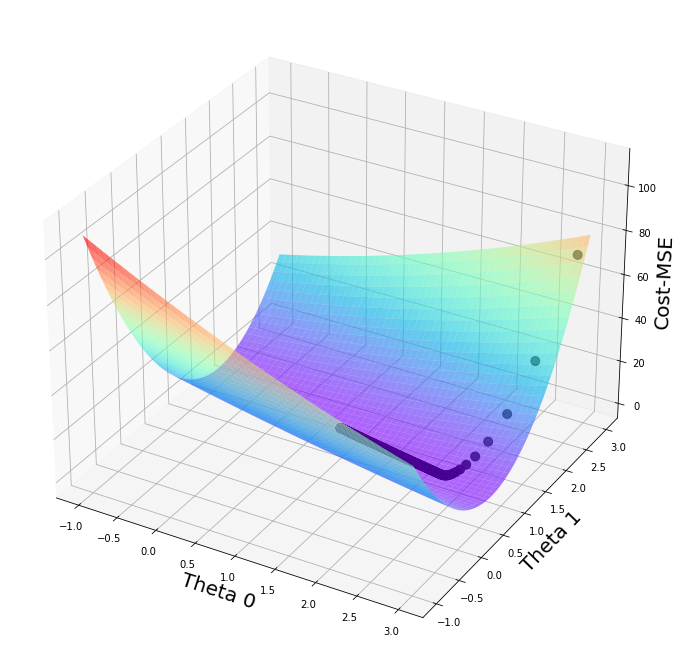

In [93]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection="3d")

ax.set_xlabel("Theta 0", fontsize=20)
ax.set_ylabel("Theta 1", fontsize=20)
ax.set_zlabel("Cost-MSE", fontsize=20)

ax.scatter(plot_values[:, 0], plot_values[:, 1], mse_values, s=80, color="black")

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.6)
plt.show()